# Regressão Linear para prever valor de corrida de táxi

## Dados e tarefa:

Vamos usar o [New York City Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data) para **prever valores das corridas de táxi na cidade de Nova York**.

## Importação dos dados e análise exploratória

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline 

In [2]:
# unzipping data...
if not (os.path.exists('../data/taxisNYC.csv')):
    print('Unzipping taxi data...')
    with zipfile.ZipFile('../data/taxisNYC.csv.zip', 'r') as zip_ref:
        zip_ref.extractall('../data/')
    print('Done!')
# loading data...
df = pd.read_csv('../data/taxisNYC.csv')

In [3]:
df.shape

(1000000, 8)

In [4]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


**Dicionário de dados**:

* **key** - chave única que IDENTIFICA CADA exemplo - *NÃO USAR EM MODELOS!!!*

* **fare_amount**	- valor, em doláres, indicando o valor pago na corrida de táxi

* **pickup_datetime**	- timestamp indicando quando a corrida começou

* **pickup_longitude** - longitude na qual a corrida de táxi começou

* **pickup_latitude** - latitude na qual a corrida de táxi começou

* **dropoff_longitude** - longitude na qual a corrida de táxi acabou

* **dropoff_latitude** - latitude na qual a corrida de táxi acabou

* **passenger_count** - número de passageiros


## Análise exploratória e feature engineering

In [5]:
df.dropna(inplace=True)
# Usaremos somente as corridas que estão registradas com pelo menos 1 dolar e no máx 100.
df = df.loc[(df.fare_amount >= 1) & (df.fare_amount <= 100)]
# Usaremos somente as corridas que estão registradas com pelo menos 1 passageiro e no máx 7.
df = df.loc[(df.passenger_count > 0) & (df.passenger_count<8)]
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

# horário
df['pickup_hour']=df['pickup_datetime'].apply(lambda x:x.hour)
# dia da semana (0 é segunda e 6 é domingo)
df['pickup_day_of_week']=df['pickup_datetime'].apply(lambda x:x.weekday())
# dia
df['pickup_day']=df['pickup_datetime'].apply(lambda x:x.day)
# mês
df['pickup_month']=df['pickup_datetime'].apply(lambda x:x.month)
# ano
df['pickup_year']=df['pickup_datetime'].apply(lambda x:x.year)

# As coordenadas de latitude variam apenas entre -90 e 90, e a longitude, entre -180 e 180. 
# Mais especificamente, o intervalo de coordenadas em NYC é:
# long_interval = (-74.04, -73.75)
# lat_interval = (40.63, 40.88)
# Então, podemos excluir os exemplos que estão fora desses intervalos:
df = df.loc[(df.pickup_latitude>=40.63) & (df.pickup_latitude<=40.88)]
df = df.loc[(df.pickup_longitude>=-74.04) & (df.pickup_longitude<=-73.75)]
df = df.loc[(df.dropoff_latitude>=40.63) & (df.dropoff_latitude<=40.88)]
df = df.loc[(df.dropoff_longitude>=-74.04) & (df.dropoff_longitude<=-73.75)]

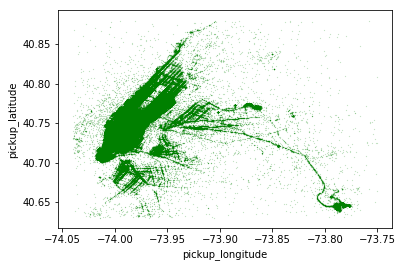

In [6]:
#Agora, com os intervalos ajustados, podemos ver os pontos de origens graficamente:

df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='green', 
                s=.02, alpha=.6)

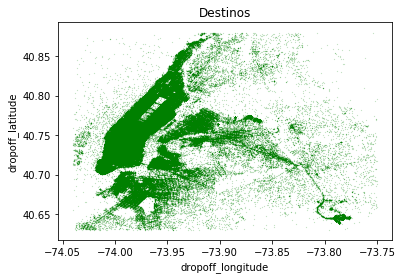

In [7]:
# E também os de destino:
df.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='green', 
                s=.02, alpha=.6)
plt.title("Destinos");

In [8]:
# Criação de características para darem a ideia de distancia percorrida:

df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

## Regressão Linear

Complete a célula abaixo para criar, treinar e avaliar um modelo de Regressão Linear usando todas as características disponíveis no dataframe. Lembre-se de não utilizar a variável resposta ("fare_amount"), a variável identificadora da corrida ("key") e não precisamos da "pickup_datetime", pois vamos usar as características derivadas dela que criamos (hour, day_of_week, day, month, year).

O valor do $R^2$ alcançado pelo modelo deve ser de $0.776$.

In [9]:
# Dividindo x e y
x = df.drop(columns = ['fare_amount', 'key', 'pickup_datetime'])
y = df.fare_amount

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state = 42)

# Treinando o modelo
model = LinearRegression().fit(x_train, y_train)

# Fazendo as predições
y_pred = model.predict(x_test)

# Calculando o erro r2- medida de qualidade do modelo
round(r2_score(y_test, y_pred),4)

0.776

## Próximos passos:

- Usamos aqui um recorte do conjunto originalmente disponibilizado no Kaggle, poderíamos baixar os 5Gb de dados e treinar com mais exemplos 
- Poderíamos criar uma características que calcula com maior exatidão a distância entre dois pontos, dado a longitude e a latitude dos pontos.
- Podemos usar bibliotecas de visualizações gráficas usando mapas mesmo para explorar mais insights com os resultados obtidos, como, por exemplo, tentar identificar se tem alguma região que estamos errando mais a predição.